In [7]:
# This cell won't appear in the presentation
import IPython.display as d
d.HTML("""<script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>""")

<br><br><br><br>

# <center>Jupyter: Kernels, Protocols,<br> and the IPython reference implementation<br><br>  </center>

<table style="border:100px solid white;">
<tr>
<td>
Paul Ivanov
</td>
<td width="100px"></td>
<td>
Matthias Bussonier
</td>
</tr>
<tr>

<td>
Bloomberg LP
</td>
<td></td>
<td>UC Berkeley</td>
</tr>

One of the foundations of Jupyter is a protocol that explicitly defines all the actions and results that comprise the workflow of interactive computing across a wide range of programming languages. This abstracts and decouples the process of code execution (performed by a kernel) from code input and results rendering. It allowed the many frontends to be developed independently but also permitted the quick addition of new kernels and languages. IPython, developed by the Jupyter team, is the canonical implementation of this protocol, providing a rich interactive experience in Python.

Matthias Bussonnier and Paul Ivanov walk you through the current Jupyter architecture and protocol and explain how kernels work (decoupled from but in communication with the environment for input and output, such as a notebook document). Matthias and Paul also offer an overview of a number of kernels developed by the community and show you how you can get started writing a new kernel.

&nbsp;

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

# Some history


- Ada Lovelace - first programmer (mid 19th century)
- Grace Hopper - first compiler (1954)
- John McCarthy - first interpreted language - LISP (1958)
- Alan Kay, Dan Ingalls, Adele Goldberg - SmallTalk (1972)
- Guido van Rossum - Python (1991)
  
- Fernando Pérez - IPython (2001)
  - "An afternoon hack" - thesis procrastination project...

<img src="/files/images/Ada_Lovelace_portrait.jpg" width=200px>

<br><br><br><br>

# Read - Eval - Print Loop  (REPL)

Historically, IPython was the Python REPL with a few extra bells and whistles...

In [1]:
2+2

4

Python provides _, which gets you the last result.
In IPython, you get to access all outputs by number like so...

In [2]:
Out[1]  # or _1

4

In [3]:
x = "Jupyter Con "

### Tab completion
Let's see what properties and methods are attached to a string, using tab-completion.

In [ ]:
x.e

In [ ]:
x.endswith?

### Object introspection
When the object we're dealing with is implemented in Python, 
`obj??` will bring up its source code!

In [ ]:
import os

In [ ]:
os.path?

In [ ]:
os.path??

Works for individual functions, too, not just modules

In [ ]:
os.path.join?
os.path.join??

<br><br><br><br><br><br><br><Br><br>
<br><br><br><br><br><br><br><Br><br>
<br><br><br><br><br><br><br><Br><br>

## What if we de-couple execution from input...

Brian and Fernando wrote up a [prototype using ZeroMQ in late Sprint 2010](https://github.com/zeromq/pyzmq/tree/f3076c9d343bad83c2392c6e3c63f90d94191527/examples/kernel)...

# QtConsole is born

- [IPython 0.11](http://ipython.org/news.html#ipython-0-11) - QtConsole (2011)  
<img src="/files/images/qtconsole.png" width=200px> (started in 2010?)

- Paul Ivanov (me) - vim-ipython (Summer 2011)
- The notebook - (December 2011)
<img src="/files/images/ipy0.12.png" width=200px></div>

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

# Analogy   (imperfect, but useful)

<table>
    <tr><th>The Web</th><th width=40%></th><th width-40%>Jupyter</th></tr>
    <tr><td>
        Browser
        <br>
        ![](/files/images/nextstation.jpg)
        </td>

        <td></td>
        <td>
        Client
        <br>
        ![](/files/images/computer.png)
        </td>
    </tr>
   
    <tr><td>
    <br>
<h3>speaks **HTTP** with</h3>
          <br>

        <br>

        </td>

        <td></td>
        <td>
                <br>
<h3>speaks **Jupyter Protocol** with</h3>
                <br>

        </td>
    </tr>
    
    <tr><td>
Webserver
        <br>
        ![](/files/images/next.jpg)
        </td>

        <td</td>
        <td>
Kernel
        <br>
        ![](/files/images/pdp12.jpg)
        </td>
    </tr>

</table>

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

<br><br><br><br><br><br><br><Br><br>
<br><br><br><br><br><br><br><Br><br>
<br><br><br><br><br><br><br><Br><br>

<br><br><br><br>

<br><br><br><br>

# Kernel

<br><br>

## Computational Engine

### - accepts messages <br><br> - performs actions <br><br> - sends out results

<br><br><br><br>

Note: In the Jupyter context, the word "kernel" is not related to the operating system kernel (Linux kernel, Windows kernel32, Darwin). A Jupyter kernel provides the computational backend to Jupyter clients.

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

# Client

<br><br><br><br>

## - connects to exactly one kernel <br><br><br> - send messages to kernel based on user actions <br><br><br> - displays kernel messages when appropriate

<br><br><br><br>

<br><br><br><br>

# One-to-Many (Kernel to Clients)

<br><br><br><br>


<centeR>
<h2>console    qtconsole   vim-ipython   jupyterlab 
<br><br><br><br><br><br>







kernel
</h2>
</centeR>







<br><br><br><br>
### %draw_arrows_here

<br><br><br><br>

<br><br><br><br>

# Why have many clients?

<br><br><br><br>

Differences in


- **multiline editing**
    - qtconsole, notebook, vim-ipython, nteract, jupyterlab 
    - (now also in terminal ipython)

- **display capabilities**
    - images in qtconsole
    - images, video, javascript in classic notebook, nteract, jupyterlab
- **persistence** 
    - no save and rerun in console, qtconsole
    - .ipynb files for notebook, EIN, nteract
    - files for vim-ipython
- **user interface** 
    <blockquote class="twitter-tweet" lang="en"><p>I have a serious illness: chronic CLI.&#10;&#10;It&#39;s terminal.</p>&mdash; Paul Ivanov (@ivanov) <a href="https://twitter.com/ivanov/statuses/462656105273757696">May 3, 2014</a></blockquote>

- **client-side requirements**
    - python for console, qtconsole (vim-ipython, bipython)
    - modern web browser for notebook, jupyterlab
    - operating system for nteract

<br><br><br><br>

<br><br><br><br><br><br><br><Br><br>
<br><br><br><br><br><br><br><Br><br>
<br><br><br><br><br><br><br><Br><br>

# Clients

## Project Jupyter

`jupyter qtconsole` - the original decoupling, uses Qt4

`jupyter console` - terminal version, decoupled 

- (different from the classic single process `ipython`)

both of these actually start a kernel and a client, 
  pass `--existing` flag to not start a *new* kernel 
  and instead simply connect to one that already
    exists.
    

`jupyter notebook` - the one you're probably most familiar with.

`jupyter lab` - alpha out, beta coming soon

## Wider Jovyan Family

[nteract](http://nteract.io) - desktop application for Linux, Windows, OS X

[hydrogen](https://nteract.gitbooks.io/hydrogen/) - Atom editor + Jupyter

([vim-ipython](https://github.com/ivanov/vim-ipython))

<br><br><br><br>

# Notebook server details of note...

Here's a [sequence diagram](/files/notebook-as-proxy.html) that explains how a notebook server acts as a proxy
for communication between a webbrowser and a kernel.

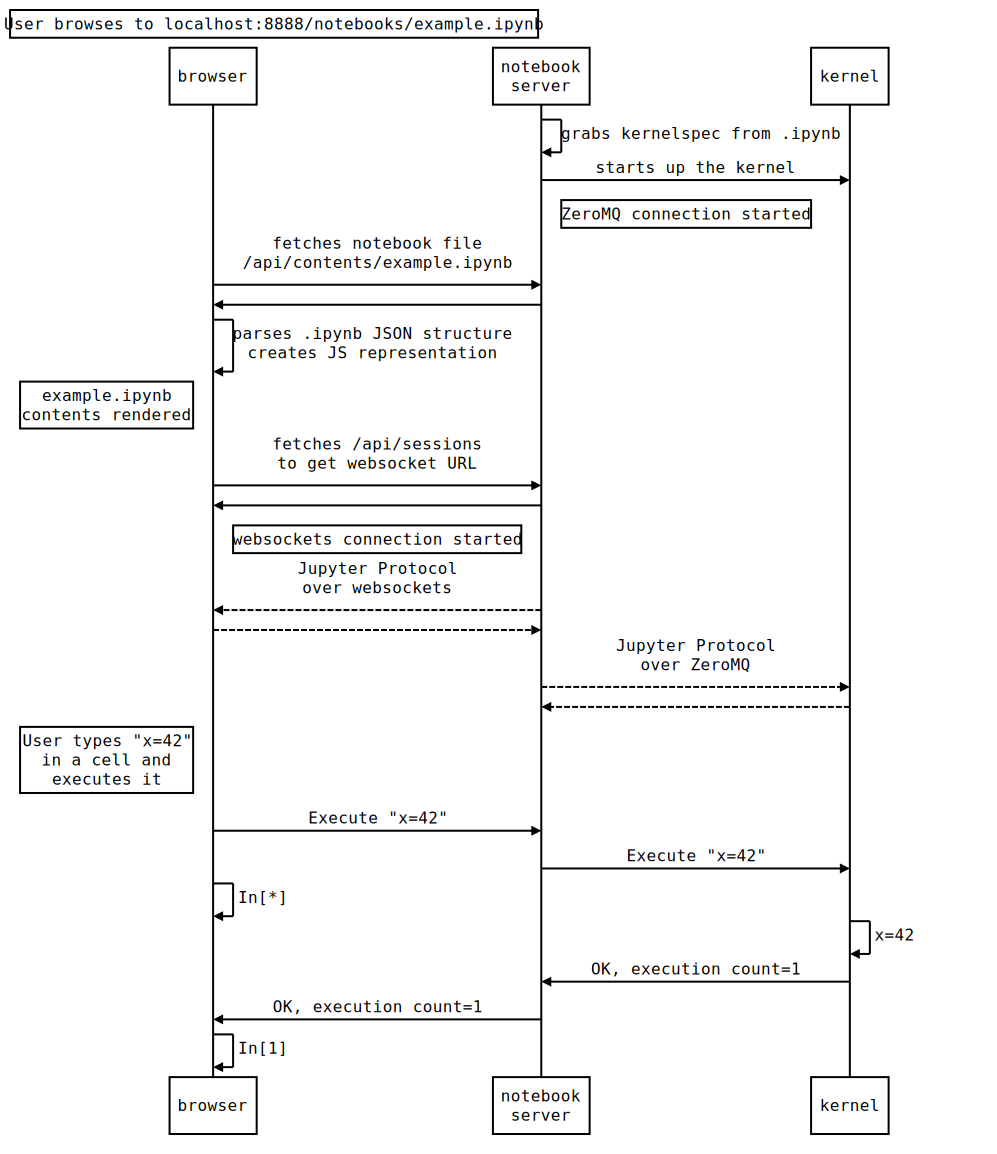

In [4]:
%%svg
<svg height="1154.96875" version="1.1" width="997.671875" xmlns="http://www.w3.org/2000/svg" style="overflow: hidden; position: relative; left: -0.986111px; top: -0.298613px;"><desc style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">Created with RaphaÃ«l 2.1.2</desc><defs style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"><path stroke-linecap="round" d="M5,0 0,2.5 5,5z" id="raphael-marker-block" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><marker id="raphael-marker-endblock55" markerHeight="5" markerWidth="5" orient="auto" refX="2.5" refY="2.5" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"><use xmlns:xlink="http://www.w3.org/1999/xlink" xlink:href="#raphael-marker-block" transform="rotate(180 2.5 2.5) scale(1,1)" stroke-width="1.0000" fill="#000" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></use></marker></defs><rect x="10" y="10" width="528.46875" height="27.765625" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="14.984375" y="15" width="518.46875" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="274.234375" y="23.8828125" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">User browses to localhost:8888/notebooks/example.ipynb</tspan></text><rect x="169.6171875" y="47.765625" width="87.203125" height="56.953125" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="179.609375" y="67.359375" width="67.203125" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="213.21875" y="76.2421875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">browser</tspan></text><rect x="169.6171875" y="1078.015625" width="87.203125" height="56.953125" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="179.609375" y="1097.609375" width="67.203125" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="213.21875" y="1106.4921875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">browser</tspan></text><path fill="none" stroke="#000000" d="M213.21875,104.71875L213.21875,1078.015625" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="493.2578125" y="47.765625" width="96.796875" height="56.953125" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="503.25" y="57.765625" width="76.796875" height="36.953125" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="541.65625" y="76.2421875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="-4.0390625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">notebook</tspan><tspan dy="19.2" x="541.65625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">server</tspan></text><rect x="493.2578125" y="1078.015625" width="96.796875" height="56.953125" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="503.25" y="1088.015625" width="76.796875" height="36.953125" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="541.65625" y="1106.4921875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="-4.0390625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">notebook</tspan><tspan dy="19.2" x="541.65625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">server</tspan></text><path fill="none" stroke="#000000" d="M541.65625,104.71875L541.65625,1078.015625" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="811.6875" y="47.765625" width="77.59375" height="56.953125" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="821.671875" y="67.359375" width="57.59375" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="850.484375" y="76.2421875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">kernel</tspan></text><rect x="811.6875" y="1078.015625" width="77.59375" height="56.953125" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="821.671875" y="1097.609375" width="57.59375" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="850.484375" y="1106.4921875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">kernel</tspan></text><path fill="none" stroke="#000000" d="M850.484375,104.71875L850.484375,1078.015625" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="566.640625" y="124.71875" width="268.828125" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="701.0625" y="133.6015625" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">grabs kernelspec from .ipynb</tspan></text><path fill="none" stroke="#000000" d="M541.65625,119.71875L561.65625,119.71875" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M561.65625,119.71875L561.65625,152.484375" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M561.65625,152.484375C561.65625,152.484375,552.5753631591797,152.484375,546.6515033841133,152.484375" stroke-width="2" stroke-dasharray="0" marker-end="url(#raphael-marker-endblock55)" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="600.046875" y="158.59375" width="192.015625" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="696.0703125" y="167.484375" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5546875" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">starts up the kernel</tspan></text><path fill="none" stroke="#000000" d="M541.65625,180.25C541.65625,180.25,805.6463004471734,180.25,845.4768305195253,180.25" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="561.65625" y="200.25" width="250.03125" height="27.765625" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="566.640625" y="205.25" width="240.03125" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="686.671875" y="214.1328125" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">ZeroMQ connection started</tspan></text><rect x="247.8125" y="234.53125" width="259.234375" height="36.96875" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="377.4375" y="253.015625" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="-4.0390625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">fetches notebook file</tspan><tspan dy="19.2" x="377.4375" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">/api/contents/example.ipynb</tspan></text><path fill="none" stroke="#000000" d="M213.21875,284.96875C213.21875,284.96875,495.4558077417314,284.96875,536.6613156835174,284.96875" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="0" y="0" width="0" height="0" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="377.4375" y="309.96875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="309.96875" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></tspan></text><path fill="none" stroke="#000000" d="M541.65625,304.96875C541.65625,304.96875,259.4191922582686,304.96875,218.2136843164826,304.96875" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="238.203125" y="324.96875" width="268.828125" height="36.953125" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="372.625" y="343.4453125" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="-4.0390625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">parses .ipynb JSON structure</tspan><tspan dy="19.2" x="372.625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">creates JS representation</tspan></text><path fill="none" stroke="#000000" d="M213.21875,319.96875L233.21875,319.96875" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M233.21875,319.96875L233.21875,371.921875" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M233.21875,371.921875C233.21875,371.921875,224.1378631591797,371.921875,218.2140033841133,371.921875" stroke-width="2" stroke-dasharray="0" marker-end="url(#raphael-marker-endblock55)" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="20" y="381.921875" width="173.21875" height="46.953125" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="24.984375" y="386.921875" width="163.21875" height="36.953125" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="106.609375" y="405.3984375" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="-4.0390625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">example.ipynb </tspan><tspan dy="19.2" x="106.609375" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"> contents rendered</tspan></text><rect x="276.609375" y="435.390625" width="201.625" height="36.96875" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="377.4375" y="453.875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="-4.0390625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">fetches /api/sessions</tspan><tspan dy="19.2" x="377.4375" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">to get websocket URL</tspan></text><path fill="none" stroke="#000000" d="M213.21875,485.828125C213.21875,485.828125,495.4558077417314,485.828125,536.6613156835174,485.828125" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="0" y="0" width="0" height="0" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="377.4375" y="510.828125" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="510.828125" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></tspan></text><path fill="none" stroke="#000000" d="M541.65625,505.828125C541.65625,505.828125,259.4191922582686,505.828125,218.2136843164826,505.828125" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="233.21875" y="525.828125" width="288.4375" height="27.765625" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="238.203125" y="530.828125" width="278.4375" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="377.4375" y="539.7109375" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">websockets connection started</tspan></text><rect x="300.625" y="560.109375" width="153.609375" height="36.96875" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="377.4375" y="578.59375" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="-4.0390625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">Jupyter Protocol</tspan><tspan dy="19.2" x="377.4375" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">over websockets</tspan></text><path fill="none" stroke="#000000" d="M541.65625,610.546875C541.65625,610.546875,259.4191922582686,610.546875,218.2136843164826,610.546875" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="6,2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="0" y="0" width="0" height="0" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="377.4375" y="635.546875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="635.546875" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></tspan></text><path fill="none" stroke="#000000" d="M213.21875,630.546875C213.21875,630.546875,495.4558077417314,630.546875,536.6613156835174,630.546875" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="6,2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="619.25" y="637.0625" width="153.609375" height="36.96875" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="696.0703125" y="655.546875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="-4.0390625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">Jupyter Protocol</tspan><tspan dy="19.2" x="696.0703125" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"> over ZeroMQ</tspan></text><path fill="none" stroke="#000000" d="M541.65625,687.5C541.65625,687.5,805.6463004471734,687.5,845.4768305195253,687.5" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="6,2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="0" y="0" width="0" height="0" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="696.0703125" y="712.5" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="712.5" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></tspan></text><path fill="none" stroke="#000000" d="M850.484375,707.5C850.484375,707.5,586.4943245528266,707.5,546.6637944804747,707.5" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="6,2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="20" y="727.5" width="173.21875" height="66.15625" r="0" rx="0" ry="0" fill="none" stroke="#000000" stroke-width="2" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><rect x="24.984375" y="732.5" width="163.21875" height="56.15625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="106.609375" y="760.578125" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="-13.640625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">User types "x=42"</tspan><tspan dy="19.2" x="106.609375" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">in a cell and</tspan><tspan dy="19.2" x="106.609375" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">executes it</tspan></text><rect x="310.21875" y="809.765625" width="134.40625" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="377.4375" y="818.65625" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5546875" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">Execute "x=42"</tspan></text><path fill="none" stroke="#000000" d="M213.21875,831.421875C213.21875,831.421875,495.4558077417314,831.421875,536.6613156835174,831.421875" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="628.859375" y="847.53125" width="134.40625" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="696.0703125" y="856.421875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5546875" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">Execute "x=42"</tspan></text><path fill="none" stroke="#000000" d="M541.65625,869.1875C541.65625,869.1875,805.6463004471734,869.1875,845.4768305195253,869.1875" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="238.203125" y="889.1875" width="48" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="262.21875" y="898.0703125" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">In[*]</tspan></text><path fill="none" stroke="#000000" d="M213.21875,884.1875L233.21875,884.1875" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M233.21875,884.1875L233.21875,916.953125" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M233.21875,916.953125C233.21875,916.953125,224.1378631591797,916.953125,218.2140033841133,916.953125" stroke-width="2" stroke-dasharray="0" marker-end="url(#raphael-marker-endblock55)" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="875.46875" y="926.953125" width="38.390625" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="894.671875" y="935.8359375" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">x=42</tspan></text><path fill="none" stroke="#000000" d="M850.484375,921.953125L870.484375,921.953125" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M870.484375,921.953125L870.484375,954.71875" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M870.484375,954.71875C870.484375,954.71875,861.4034881591797,954.71875,855.4796283841133,954.71875" stroke-width="2" stroke-dasharray="0" marker-end="url(#raphael-marker-endblock55)" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="595.25" y="960.828125" width="201.625" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="696.0703125" y="969.71875" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5546875" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">OK, execution count=1</tspan></text><path fill="none" stroke="#000000" d="M850.484375,982.484375C850.484375,982.484375,586.4943245528266,982.484375,546.6637944804747,982.484375" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="276.609375" y="998.59375" width="201.625" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="377.4375" y="1007.484375" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5546875" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">OK, execution count=1</tspan></text><path fill="none" stroke="#000000" d="M541.65625,1020.25C541.65625,1020.25,259.4191922582686,1020.25,218.2136843164826,1020.25" stroke-width="2" marker-end="url(#raphael-marker-endblock55)" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><rect x="238.203125" y="1040.25" width="48" height="17.765625" r="0" rx="0" ry="0" fill="#ffffff" stroke="none" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></rect><text x="262.21875" y="1049.1328125" text-anchor="middle" font="10px &quot;Arial&quot;" stroke="none" fill="#000000" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0); text-anchor: middle; font-style: normal; font-variant: normal; font-weight: normal; font-stretch: normal; font-size: 16px; line-height: normal; font-family: &quot;Andale Mono&quot;, monospace;" font-size="16px" font-family="Andale Mono, monospace"><tspan dy="5.5625" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);">In[1]</tspan></text><path fill="none" stroke="#000000" d="M213.21875,1035.25L233.21875,1035.25" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M233.21875,1035.25L233.21875,1068.015625" stroke-width="2" stroke-dasharray="0" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path><path fill="none" stroke="#000000" d="M233.21875,1068.015625C233.21875,1068.015625,224.1378631591797,1068.015625,218.2140033841133,1068.015625" stroke-width="2" stroke-dasharray="0" marker-end="url(#raphael-marker-endblock55)" style="-webkit-tap-highlight-color: rgba(0, 0, 0, 0);"></path></svg>

<br><br><br><br>

<br><br><br><br>

# Demo time

<br><br><br><br>

<br><br><br><br>

<br><br><br><br>

# Anatomy of a Message

<br><br><br><br>

In brief, read [the messaging
spec](https://jupyter-client.readthedocs.io/en/latest/messaging.html) for more
details.

Essential fields:

    header:
        msg_id:
        msg_type: status, execute_request, execute_reply, error, object_info_request,
        complete_request, complete_reply, history_request, ...

    parent_header: (see above, for replies)

    content: structure depends on message type

        example: execute_request
            - code (str)
            - silent (bool)
            - store_history (bool)

        example: execute_reply
            - status ('ok', 'error', or 'abort')
            - execution_count (prompt numbers)

Jupyter protocol over zermoq happens over multiple channels not just one.
    - stdin
    - Shell ( action requests: execution, object introspection, code completion )
    - IOPub ( "broadcast channel" )

# Demo time

In [ ]:
%connect_info